# Individual Project
# Statistical & Machine Learning

### By 
#### Swasthik Vellingiri Kowsalya

### Loading Libraries

In [181]:
# Set environment params
Sys.setenv(LANG='en')  

# Import libraries

library(data.table)    # Data manipulate
library(caret)         # ML toolkit
library(mlr)           # ML toolkit
library(party)         # Data processing
library(pROC)          # AUC, ROC
library(rpart)         # Decision tree
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree
library(fastDummies)
library(MASS)
library(class)
library(kknn)
library(Boruta)

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

[1] "R version 4.0.5 (2021-03-31)"

##### Loading the data 

In [182]:
df = read.csv('../Individual Project/Dataset 1_Bank Marketing/bank_mkt_train.csv')

In [183]:
dataset = df

##### Identifying the independant and dependant variables and Identifying the numerical and categorical variables

In [184]:
ind_variable <- colnames(dataset)[2:(ncol(dataset)-1)]
dep_variable <- colnames(dataset)[ncol(dataset)]

In [185]:
numerical = names(which(unlist(lapply(dataset[ind_variable], is.numeric)) == TRUE))
categorical = names(which(unlist(lapply(dataset[ind_variable], is.numeric)) == FALSE))

In [186]:
numerical

[1] "age"            "campaign"       "pdays"          "previous"      
[5] "emp.var.rate"   "cons.price.idx" "cons.conf.idx"  "euribor3m"     
[9] "nr.employed"

In [187]:
categorical

[1] "job"         "marital"     "education"   "default"     "housing"    
 [6] "loan"        "contact"     "month"       "day_of_week" "poutcome"

##### Finding the NA values in the data

In [188]:
na_values <-sapply(dataset, function(y) sum(length(which(is.na(y)))))
na_values <- data.frame(na_values)
na_values

,na_values
,<int>
client_id,0
age,202
job,161
marital,199
education,170
default,214
housing,195
loan,219
contact,217


##### Filling missing values 0 for numerical and "Missing" for categorical

In [189]:
# Numerical variables - Filled with 0
for (i in numerical) { dataset[is.na(dataset[i]), i] <- 0 }

for (v in categorical) { dataset[is.na(dataset[v]), v] <- "Missing" }

In [190]:
# Checking the NA values of the numerical columns

na_values1 <-sapply(dataset, function(y) sum(length(which(is.na(y)))))
na_values1 <- data.frame(na_values1)
na_values1

,na_values1
,<int>
client_id,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0


##### Encoding the columns and creation of base table

In [191]:
data_encoded <- dummy_cols(dataset, select_columns = categorical,remove_selected_columns = TRUE)

In [192]:
base_table = subset(data_encoded, select = -c(client_id) )

# Names of the base table to altered

names(base_table) <- gsub("-", "_", names(base_table))

In [193]:
str(base_table)

'data.frame':	20000 obs. of  73 variables:
 $ age                          : num  42 35 44 45 45 38 33 38 29 34 ...
 $ campaign                     : num  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays                        : num  999 999 999 999 999 999 0 999 999 999 ...
 $ previous                     : num  0 0 0 0 0 0 1 0 1 0 ...
 $ emp.var.rate                 : num  1.4 1.4 -1.8 -1.8 1.1 1.1 -1.8 1.1 -1.8 1.4 ...
 $ cons.price.idx               : num  93.9 94.5 92.9 93.1 94 ...
 $ cons.conf.idx                : num  -42.7 -41.8 -46.2 -47.1 -36.4 -36.4 -47.1 -36.4 -46.2 -36.1 ...
 $ euribor3m                    : num  4.97 4.96 1.26 1.45 4.86 ...
 $ nr.employed                  : num  5228 5228 5099 5099 5191 ...
 $ subscribe                    : int  0 0 0 0 0 0 1 0 0 0 ...
 $ job_admin.                   : int  0 0 0 0 0 0 0 0 0 1 ...
 $ job_blue_collar              : int  0 0 0 0 0 0 0 1 1 0 ...
 $ job_entrepreneur             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ job_housemaid                :

In [313]:
write.csv(base_table,"./Individual Project", row.names = FALSE)

# Feature Selection

##### Selecting the important features using the boruta feature selection method

In [13]:
set.seed(111)
boruta <- Boruta(subscribe ~ ., data = base_table, doTrace = 2)
print(boruta)

 1. run of importance source...



Computing permutation importance.. Progress: 45%. Estimated remaining time: 37 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 7 seconds.


 2. run of importance source...



Computing permutation importance.. Progress: 45%. Estimated remaining time: 38 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 7 seconds.


 3. run of importance source...



Computing permutation importance.. Progress: 45%. Estimated remaining time: 37 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 6 seconds.


 4. run of importance source...



Computing permutation importance.. Progress: 42%. Estimated remaining time: 42 seconds.
Computing permutation importance.. Progress: 86%. Estimated remaining time: 10 seconds.


 5. run of importance source...



Computing permutation importance.. Progress: 44%. Estimated remaining time: 39 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 6 seconds.


 6. run of importance source...



Computing permutation importance.. Progress: 45%. Estimated remaining time: 37 seconds.
Computing permutation importance.. Progress: 89%. Estimated remaining time: 7 seconds.


 7. run of importance source...



Computing permutation importance.. Progress: 39%. Estimated remaining time: 48 seconds.
Computing permutation importance.. Progress: 79%. Estimated remaining time: 16 seconds.


 8. run of importance source...



Computing permutation importance.. Progress: 42%. Estimated remaining time: 43 seconds.
Computing permutation importance.. Progress: 84%. Estimated remaining time: 11 seconds.


 9. run of importance source...



Computing permutation importance.. Progress: 45%. Estimated remaining time: 37 seconds.
Computing permutation importance.. Progress: 90%. Estimated remaining time: 7 seconds.


 10. run of importance source...



Computing permutation importance.. Progress: 47%. Estimated remaining time: 35 seconds.
Computing permutation importance.. Progress: 93%. Estimated remaining time: 4 seconds.


 11. run of importance source...



Computing permutation importance.. Progress: 41%. Estimated remaining time: 44 seconds.
Computing permutation importance.. Progress: 82%. Estimated remaining time: 13 seconds.


 12. run of importance source...



Computing permutation importance.. Progress: 35%. Estimated remaining time: 57 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 21 seconds.


 13. run of importance source...



Computing permutation importance.. Progress: 47%. Estimated remaining time: 34 seconds.
Computing permutation importance.. Progress: 95%. Estimated remaining time: 3 seconds.


After 13 iterations, +20 mins: 

 confirmed 24 attributes: age, cons.conf.idx, cons.price.idx, contact_cellular, contact_telephone and 19 more;

 rejected 22 attributes: contact_Missing, day_of_week_Missing, day_of_week_thu, default_Missing, default_yes and 17 more;

 still have 26 attributes left.


 14. run of importance source...



Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 15. run of importance source...



Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.


 16. run of importance source...



Computing permutation importance.. Progress: 79%. Estimated remaining time: 8 seconds.


 17. run of importance source...



Computing permutation importance.. Progress: 81%. Estimated remaining time: 7 seconds.


After 17 iterations, +23 mins: 

 confirmed 2 attributes: job_retired, month_aug;

 rejected 2 attributes: job_services, loan_unknown;

 still have 22 attributes left.


 18. run of importance source...



Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.


 19. run of importance source...



Computing permutation importance.. Progress: 68%. Estimated remaining time: 14 seconds.


 20. run of importance source...



Computing permutation importance.. Progress: 78%. Estimated remaining time: 8 seconds.


 21. run of importance source...



Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


After 21 iterations, +27 mins: 

 rejected 2 attributes: education_high.school, job_technician;

 still have 20 attributes left.


 22. run of importance source...



Computing permutation importance.. Progress: 92%. Estimated remaining time: 2 seconds.


 23. run of importance source...



Computing permutation importance.. Progress: 91%. Estimated remaining time: 2 seconds.


 24. run of importance source...



Computing permutation importance.. Progress: 62%. Estimated remaining time: 18 seconds.


After 24 iterations, +29 mins: 

 confirmed 4 attributes: campaign, day_of_week_fri, education_university.degree, job_unknown;

 rejected 1 attribute: education_professional.course;

 still have 15 attributes left.


 25. run of importance source...



Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 26. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 27. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 28. run of importance source...



Computing permutation importance.. Progress: 94%. Estimated remaining time: 2 seconds.


After 28 iterations, +32 mins: 

 confirmed 1 attribute: marital_single;

 rejected 1 attribute: housing_unknown;

 still have 13 attributes left.


 29. run of importance source...



Computing permutation importance.. Progress: 98%. Estimated remaining time: 0 seconds.


 30. run of importance source...



Computing permutation importance.. Progress: 98%. Estimated remaining time: 0 seconds.


 31. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 0 seconds.


 32. run of importance source...



Computing permutation importance.. Progress: 100%. Estimated remaining time: 0 seconds.


 33. run of importance source...



Computing permutation importance.. Progress: 99%. Estimated remaining time: 0 seconds.


 34. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 0 seconds.


After 34 iterations, +36 mins: 

 rejected 1 attribute: job_management;

 still have 12 attributes left.


 35. run of importance source...

 36. run of importance source...

 37. run of importance source...

 38. run of importance source...



Computing permutation importance.. Progress: 99%. Estimated remaining time: 0 seconds.


 39. run of importance source...

 40. run of importance source...

 41. run of importance source...

 42. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 0 seconds.


 43. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 44. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 45. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 0 seconds.


After 45 iterations, +44 mins: 

 confirmed 1 attribute: job_blue_collar;

 still have 11 attributes left.


 46. run of importance source...



Computing permutation importance.. Progress: 89%. Estimated remaining time: 3 seconds.


 47. run of importance source...

 48. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 49. run of importance source...



Computing permutation importance.. Progress: 98%. Estimated remaining time: 0 seconds.


 50. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 51. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 52. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 53. run of importance source...

 54. run of importance source...

 55. run of importance source...



Computing permutation importance.. Progress: 93%. Estimated remaining time: 2 seconds.


 56. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 1 seconds.


 57. run of importance source...



Computing permutation importance.. Progress: 93%. Estimated remaining time: 2 seconds.


 58. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 59. run of importance source...



Computing permutation importance.. Progress: 99%. Estimated remaining time: 0 seconds.


After 59 iterations, +54 mins: 

 confirmed 1 attribute: housing_yes;

 still have 10 attributes left.


 60. run of importance source...



Computing permutation importance.. Progress: 99%. Estimated remaining time: 0 seconds.


 61. run of importance source...



Computing permutation importance.. Progress: 98%. Estimated remaining time: 0 seconds.


 62. run of importance source...



Computing permutation importance.. Progress: 98%. Estimated remaining time: 0 seconds.


 63. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 64. run of importance source...



Computing permutation importance.. Progress: 94%. Estimated remaining time: 1 seconds.


After 64 iterations, +58 mins: 

 confirmed 1 attribute: housing_no;

 still have 9 attributes left.


 65. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 66. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 67. run of importance source...

 68. run of importance source...

 69. run of importance source...

 70. run of importance source...

 71. run of importance source...

 72. run of importance source...

 73. run of importance source...

 74. run of importance source...

 75. run of importance source...

 76. run of importance source...

 77. run of importance source...



Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.


 78. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 79. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 80. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 81. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 82. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 83. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 84. run of importance source...



Computing permutation importance.. Progress: 92%. Estimated remaining time: 2 seconds.


 85. run of importance source...



Computing permutation importance.. Progress: 91%. Estimated remaining time: 3 seconds.


 86. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 87. run of importance source...



Computing permutation importance.. Progress: 95%. Estimated remaining time: 1 seconds.


 88. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 1 seconds.


 89. run of importance source...



Computing permutation importance.. Progress: 97%. Estimated remaining time: 0 seconds.


 90. run of importance source...



Computing permutation importance.. Progress: 96%. Estimated remaining time: 1 seconds.


 91. run of importance source...



Computing permutation importance.. Progress: 92%. Estimated remaining time: 2 seconds.


 92. run of importance source...

 93. run of importance source...

 94. run of importance source...



Computing permutation importance.. Progress: 99%. Estimated remaining time: 0 seconds.


 95. run of importance source...

 96. run of importance source...

 97. run of importance source...

 98. run of importance source...

 99. run of importance source...

After 99 iterations, +1.4 hours: 

 confirmed 1 attribute: loan_no;

 still have 8 attributes left.




Boruta performed 99 iterations in 1.369861 hours.
 35 attributes confirmed important: age, campaign, cons.conf.idx,
cons.price.idx, contact_cellular and 30 more;
 29 attributes confirmed unimportant: contact_Missing,
day_of_week_Missing, day_of_week_thu, default_Missing, default_yes and
24 more;
 8 tentative attributes left: day_of_week_tue, day_of_week_wed,
education_basic.9y, education_unknown, job_student and 3 more;


##### Plotting Boruta - Initial Analysis

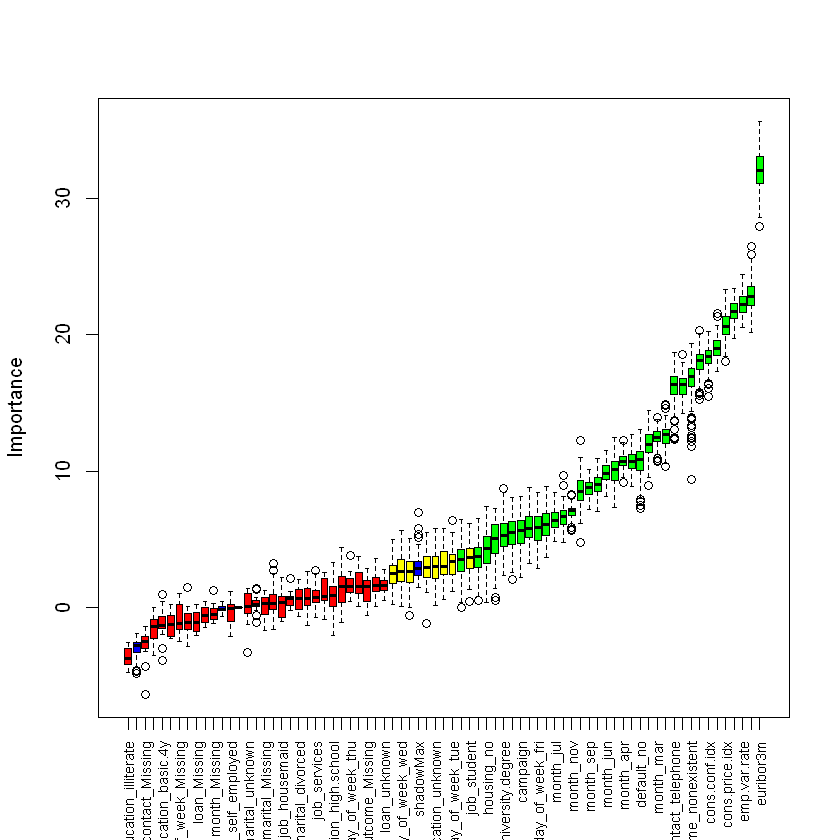

In [194]:
plot(boruta, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta$ImpHistory),function(i)
boruta$ImpHistory[is.finite(boruta$ImpHistory[,i]),i])
names(lz) <- colnames(boruta$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta$ImpHistory), cex.axis = 0.7)

##### Further Analysing the tentative variables to select variables

In [153]:
final_boruta <- TentativeRoughFix(boruta)
print(final_boruta)

Boruta performed 99 iterations in 1.369861 hours.
Tentatives roughfixed over the last 99 iterations.
 41 attributes confirmed important: age, campaign, cons.conf.idx,
cons.price.idx, contact_cellular and 36 more;
 31 attributes confirmed unimportant: contact_Missing,
day_of_week_Missing, day_of_week_thu, default_Missing, default_yes and
26 more;


##### The final selected variables are

In [158]:
getSelectedAttributes(final_boruta, withTentative = F)

[1] "age"                         "campaign"                   
 [3] "pdays"                       "previous"                   
 [5] "emp.var.rate"                "cons.price.idx"             
 [7] "cons.conf.idx"               "euribor3m"                  
 [9] "nr.employed"                 "job_blue_collar"            
[11] "job_retired"                 "job_student"                
[13] "job_unknown"                 "marital_married"            
[15] "marital_single"              "education_university.degree"
[17] "education_unknown"           "default_no"                 
[19] "default_unknown"             "housing_no"                 
[21] "housing_yes"                 "loan_no"                    
[23] "loan_yes"                    "contact_cellular"           
[25] "contact_telephone"           "month_apr"                  
[27] "month_aug"                   "month_jul"                  
[29] "month_jun"                   "month_mar"                  
[31] "month_may"                   "month_nov"                  
[33] "month_oct"                   "month_sep"                  
[35] "day_of_week_fri"             "day_of_week_mon"            
[37] "day_of_week_tue"             "day_of_week_wed"            
[39] "poutcome_failure"            "poutcome_nonexistent"       
[41] "poutcome_success"

##### Plotting Boruta - Final selected variables

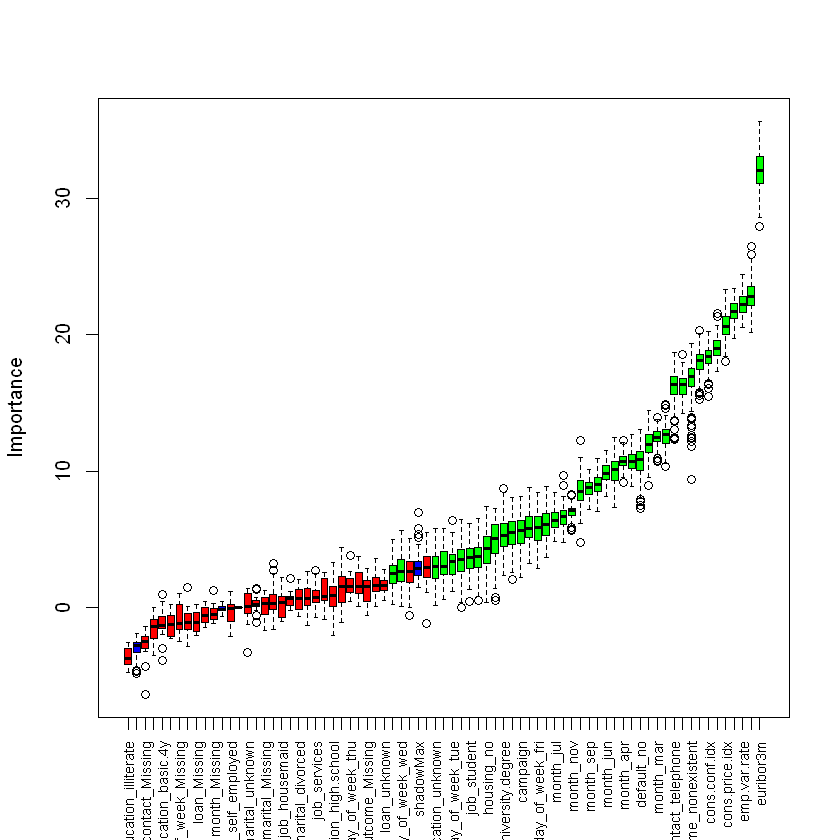

In [159]:
plot(final_boruta, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(final_boruta$ImpHistory),function(i)
final_boruta$ImpHistory[is.finite(final_boruta$ImpHistory[,i]),i])
names(lz) <- colnames(final_boruta$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(final_boruta$ImpHistory), cex.axis = 0.7)

##### Changing the base table to have only selected variables

In [195]:
selected = getSelectedAttributes(final_boruta, withTentative = F)
target_var = "subscribe"
selected_columns = c(selected,target_var)
new_base_table = subset(base_table,select = names(base_table) %in% selected_columns)

In [196]:
head(new_base_table)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,⋯,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,42,1,999,0,1.4,93.918,-42.7,4.968,5228.1,0,⋯,0,0,0,0,0,0,0,0,1,0
2,35,4,999,0,1.4,94.465,-41.8,4.960,5228.1,0,⋯,0,0,0,0,1,0,0,0,1,0
3,44,1,999,0,-1.8,92.893,-46.2,1.264,5099.1,0,⋯,0,0,0,0,1,0,0,0,1,0
4,45,1,999,0,-1.8,93.075,-47.1,1.453,5099.1,0,⋯,0,0,0,0,0,1,0,0,1,0
5,45,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,⋯,0,0,0,0,0,0,1,0,1,0
6,38,2,999,0,1.1,93.994,-36.4,4.858,5191.0,0,⋯,0,0,0,0,0,0,1,0,1,0


# Train Test Split

In [197]:
split1 = sample(c(rep(0, 0.7 * nrow(new_base_table)), rep(1, 0.3 * nrow(new_base_table))))
train <- new_base_table[split1 == 0, ]
test <- new_base_table[split1 == 1, ]

In [294]:
dim(train)
dim(test)

[1] 14000    42

[1] 6000   42

## Logistic Regression

##### Cross-validation and hyperparameter tuning

In [199]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=100, predict="both")

# Define the model
learner <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="credit_mkt", data=train, target="subscribe")

# Set hyper parameter tuning
tune_params <- makeParamSet()
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
                      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Resampling: cross-validation

Measures:             auc.train   auc.test    

[Resample] iter 1:    0.7951946   0.6971767   

[Resample] iter 2:    0.7953924   0.6786227   

[Resample] iter 3:    0.7953772   0.6471354   

[Resample] iter 4:    0.7939170   0.8535156   

[Resample] iter 5:    0.7936578   0.8436155   

[Resample] iter 6:    0.7932840   0.9041579   

[Resample] iter 7:    0.7942911   0.7718795   

[Resample] iter 8:    0.7933875   0.8375000   

[Resample] iter 9:    0.7943891   0.7877604   

[Resample] iter 10:   0.7944609   0.7801268   

[Resample] iter 11:   0.7954064   0.7137391   

[Resample] iter 12:   0.7941300   0.8094758   

[Resample] iter 13:   0.7952256   0.7207482   

[Resample] iter 14:   0.7942821   0.8004032   

[Resample] iter 15:   0.7940600   0.8412698   

[Resample] iter 16:   0.7956689   0.6093277   

[Resample] iter 17:   0.7945507   0.7580645   

[Resample] iter 18:   0.7944297   0.7849788   

[Resample] iter 19:   0.7943993   0.7936198   

[Resample]

##### Retrain the model with the best hyper-parameters

In [304]:
best_lg <- mlr::train(best_learner, train_task)

##### Predicting the test data set and finding accuracy, AUC

In [305]:
# predicting on test

pred_lg <- predict(best_lg, newdata=test, type="response")

# finding accuracy and AUC

lg_accuracy = 100 * mean(pred_lg$data$response==test$subscribe)
lg_auc = auc(test$subscribe, pred_lg$data$prob.1)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



##### Predicting the train data set and finding accuracy, AUC

In [306]:
# predicting on train data

pred_lg_train <- predict(best_lg, newdata=train, type="response")

# finding accuracy and AUC

lg_accuracy_train = 100 * mean(pred_lg_train$data$response==train$subscribe)
lg_auc_train = auc(train$subscribe, pred_lg_train$data$prob.1)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# Decision Trees

##### cross-validation and hyperparameter tuning

In [206]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=30, predict="both")

# Define the model
learner <- makeLearner("classif.rpart", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="credit_mkt", data=train, target="subscribe")

# Set hyper parameter tuning
tune_params <- makeParamSet(
    makeDiscreteParam('maxdepth', value=c(2,3,4,5,7,8,10,12)),
    makeDiscreteParam('minsplit', value=c(5,10,15,20,25,30))
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
                      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

[Tune] Started tuning learner classif.rpart for parameter set:

             Type len Def            Constr Req Tunable Trafo
maxdepth discrete   -   - 2,3,4,5,7,8,10,12   -    TRUE     -
minsplit discrete   -   -  5,10,15,20,25,30   -    TRUE     -

With control class: TuneControlGrid

Imputation value: -0

[Tune-x] 1: maxdepth=2; minsplit=5

[Tune-y] 1: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 2: maxdepth=3; minsplit=5

[Tune-y] 2: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 3: maxdepth=4; minsplit=5

[Tune-y] 3: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 4: maxdepth=5; minsplit=5

[Tune-y] 4: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 5: maxdepth=7; minsplit=5

[Tune-y] 5: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 6: maxdepth=8; minsplit=5

[Tune-y] 6: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 7: maxdepth=10; minsplit=5

[Tune-y] 7: auc.test.mean=0.7124166; time: 0.1 min

[Tune-x] 8: maxdepth=12; minsplit=5

[Tune-y] 8: auc.test.mean=0.7124166;

##### Retrain the model with the best hyper-parameters

In [267]:
best_dt <- mlr::train(best_learner, train_task)

##### Predicting the test data set and finding accuracy, AUC

In [298]:
# prediction on test 

pred_dt <- predict(best_dt, newdata=test)

# Finding accuracy and AUC
dt_accuracy = 100 * mean(pred_dt$data$response==test$subscribe)
dt_auc = auc(test$subscribe, pred_dt$data$prob.1)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



##### Predicting the train data set and finding accuracy, AUC

In [299]:
# prediction on test 
pred_dt_train <- predict(best_dt, newdata=train)

# Finding accuracy and AUC
dt_accuracy_train = 100 * mean(pred_dt_train$data$response==train$subscribe)
dt_auc_train = auc(train$subscribe, pred_dt_train$data$prob.1)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



## KNN - K-Nearest Neighbors

##### cross-validation and hyperparameter tuning

In [214]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="student", data=train, target="subscribe")

# Set hyper parameter tuning
discrete_ps = makeParamSet(
  makeDiscreteParam("k", values = c(1, 5, 10, 20, 50, 100, 200, 300))
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
res <- tuneParams(lnr_knn, task=task_logreg, resampling=rdesc,
  par.set=discrete_ps, control=ctrl, measures=list(mlr::acc))

[Tune] Started tuning learner classif.kknn for parameter set:

      Type len Def                   Constr Req Tunable Trafo
k discrete   -   - 1,5,10,20,50,100,200,300   -    TRUE     -

With control class: TuneControlGrid

Imputation value: -0

[Tune-x] 1: k=1

[Tune-y] 1: acc.test.mean=0.8442143; time: 0.1 min

[Tune-x] 2: k=5

[Tune-y] 2: acc.test.mean=0.8441429; time: 0.1 min

[Tune-x] 3: k=10

[Tune-y] 3: acc.test.mean=0.8872143; time: 0.2 min

[Tune-x] 4: k=20

[Tune-y] 4: acc.test.mean=0.8945000; time: 0.2 min

[Tune-x] 5: k=50

[Tune-y] 5: acc.test.mean=0.8966429; time: 0.2 min

[Tune-x] 6: k=100

[Tune-y] 6: acc.test.mean=0.8971429; time: 0.2 min

[Tune-x] 7: k=200

[Tune-y] 7: acc.test.mean=0.8969286; time: 0.3 min

[Tune-x] 8: k=300

[Tune-y] 8: acc.test.mean=0.8964286; time: 0.4 min

[Tune] Result: k=100 : acc.test.mean=0.8971429



##### Retrain the model with the best hyper-parameters and Predicting the test data set and finding accuracy, AUC

In [263]:
# predicting test dataset

classifier_knn <- knn(train = train,
                      test = test,
                      cl = train$subscribe,
                      k = 100)

misClassError <- mean(classifier_knn != test$subscribe)

#accuracy
accuracy_knn = (1-misClassError)*100

# AUC
knn_roc = pROC::roc(classifier_knn, test$subscribe)
knn_auc = pROC::auc(knn_roc)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



The Accuracy of KNN is =  90.08333    The AUC of KNN is =  0.806246

##### Retrain the model with the best hyper-parameters and Predicting the train data set and finding accuracy, AUC

In [282]:
# predicting train dataset

classifier_knn_train <- knn(train = train,
                      test = train,
                      cl = train$subscribe,
                      k = 100)

misClassError_train <- mean(classifier_knn_train != train$subscribe)

#accuracy
accuracy_knn_train = (1-misClassError_train)*100

#AUC
knn_roc_train = pROC::roc(classifier_knn_train, train$subscribe)
knn_auc_train = pROC::auc(knn_roc_train)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



## Gradient Boosting

##### cross-validation and hyperparameter tuning

In [176]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=5, predict="both")

# Define the model
learner <- makeLearner("classif.gbm", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="credit_mkt", data=train, target="subscribe")

In [177]:
# Set hyper parameter tuning
tune_params <- makeParamSet(
    makeDiscreteParam('distribution', value=c('bernoulli')),
    makeDiscreteParam('n.trees', value=c(100,200,500,1000,2000)),
    makeDiscreteParam('interaction.depth', value=c(15,25,30,40,45)),
    makeDiscreteParam('train.fraction', values =c(1)),
    makeDiscreteParam('shrinkage', values = (0.001))      
)

ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
                      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

[Tune] Started tuning learner classif.gbm for parameter set:

                      Type len Def                Constr Req Tunable Trafo
distribution      discrete   -   -             bernoulli   -    TRUE     -
n.trees           discrete   -   - 100,200,500,1000,2000   -    TRUE     -
interaction.depth discrete   -   -        15,25,30,40,45   -    TRUE     -
train.fraction    discrete   -   -                     1   -    TRUE     -
shrinkage         discrete   -   -                 0.001   -    TRUE     -

With control class: TuneControlGrid

Imputation value: -0

[Tune-x] 1: distribution=bernoulli; n.trees=100; interaction.depth=15; train.fraction=1; shrinkage=0.001

[Tune-y] 1: auc.test.mean=0.7775641; time: 1.4 min

[Tune-x] 2: distribution=bernoulli; n.trees=200; interaction.depth=15; train.fraction=1; shrinkage=0.001

[Tune-y] 2: auc.test.mean=0.7787466; time: 2.5 min

[Tune-x] 3: distribution=bernoulli; n.trees=500; interaction.depth=15; train.fraction=1; shrinkage=0.001

[Tune-

##### Retrain the model with the best hyper-parameters and Predicting the test

In [283]:
# Retrain the model with tbe best hyper-parameters

best_gb <- mlr::train(best_learner, train_task)

##### Prediction using the test dataset and finding accuracy, AUC

In [ ]:
pred_gb <- predict(best_gb, newdata=test)

# finding accuracy,auc in test set

gb_accuracy = 100*mean(pred_gb$data$response==test$subscribe)
gb_auc = auc(test$subscribe, pred_gb$data$prob.1)

##### Prediction using the train dataset and finding accuracy, AUC

In [284]:
pred_gb_train <- predict(best_gb, newdata=train)

# finding accuracy in train set

gb_accuracy_train = 100*mean(pred_gb_train$data$response==train$subscribe)
gb_auc_train = auc(train$subscribe, pred_gb_train$data$prob.1)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# Support Vector Machines

##### cross-validation and hyperparameter tuning

In [216]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10, predict="both")

# Define the model
learner <- makeLearner("classif.ksvm", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="credit_mkt", data=train, target="subscribe")

# Set hyper parameter tuning
tune_params <- makeParamSet()
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
                      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Resampling: cross-validation

Measures:             auc.train   auc.test    

[Resample] iter 1:    0.8814135   0.7128714   

[Resample] iter 2:    0.8826383   0.7047373   

[Resample] iter 3:    0.8811591   0.7416554   

[Resample] iter 4:    0.8860257   0.6658158   

[Resample] iter 5:    0.8889232   0.7264485   

[Resample] iter 6:    0.8810715   0.7422477   

[Resample] iter 7:    0.8809950   0.6857638   

[Resample] iter 8:    0.8857649   0.7134133   

[Resample] iter 9:    0.8833118   0.7272682   

[Resample] iter 10:   0.8864066   0.6706928   




Aggregated Result: auc.test.mean=0.7090914,auc.train.mean=0.8837710






##### Training the model with svm

In [217]:
library(e1071)
classifier = svm(formula = subscribe ~ .,
                 data = train,
                 type = 'C-classification',
                 kernel = 'linear')

##### Prediction using the test dataset and finding accuracy, AUC

In [297]:
svm_pred = predict(classifier, newdata = test)
svm_accuracy = 100*mean(svm_pred==test$subscribe)

svm_roc = pROC::roc(svm_pred, test$subscribe)
svm_auc = pROC::auc(svm_roc)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



##### Prediction using the Train dataset and finding accuracy, AUC

In [296]:
svm_pred_train = predict(classifier, newdata = train)
svm_accuracy_train = 100*mean(svm_pred_train==train$subscribe)

svm_roc_train = pROC::roc(svm_pred_train, train$subscribe)
svm_auc_train = pROC::auc(svm_roc_train)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



### Comparing the accuracy and AUC

##### Prediction made using the test dataset

In [302]:
Models = c("Logistic Regression", "Decision Trees", "K-Nearest Neighbors", "Gradient Boosting", "Support Vector Machines")
Accuracy_in_perct_test = c(lg_accuracy, dt_accuracy, accuracy_knn, gb_accuracy, svm_accuracy)
AUC_scores_test = c(lg_auc, dt_auc, knn_auc, gb_auc, svm_auc)

Benchmark_test = data.frame(Models, Accuracy_in_perct_test,AUC_scores_test)

Benchmark_test

Models,Accuracy_in_perct_test,AUC_scores_test
<chr>,<dbl>,<dbl>
Logistic Regression,90.16667,0.6997270
Decision Trees,90.15000,0.6995627
K-Nearest Neighbors,90.08333,0.8062460
Gradient Boosting,90.18333,0.6997898
Support Vector Machines,89.93333,0.7843380


##### Prediction made using the train dataset

In [303]:
Models = c("Logistic Regression", "Decision Trees", "K-Nearest Neighbors", "Gradient Boosting", "Support Vector Machines")
Accuracy_in_perct_train = c(lg_accuracy_train, dt_accuracy_train, accuracy_knn_train, gb_accuracy_train, svm_accuracy_train)
AUC_scores_train = c(lg_auc_train, dt_auc_train, knn_auc_train, gb_auc_train, svm_auc_train)

Benchmark_train = data.frame(Models, Accuracy_in_perct_train,AUC_scores_train)

Benchmark_train

Models,Accuracy_in_perct_train,AUC_scores_train
<chr>,<dbl>,<dbl>
Logistic Regression,90.46429,0.8794195
Decision Trees,90.45714,0.8796736
K-Nearest Neighbors,89.93571,0.8067439
Gradient Boosting,90.45000,0.8804134
Support Vector Machines,89.64286,0.7798907


## References

1.	https://www.analyticsvidhya.com/blog/2016/03/select-important-variables-boruta-package/
2.	https://cran.r-project.org/web/packages/Boruta/Boruta.pdf
